In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

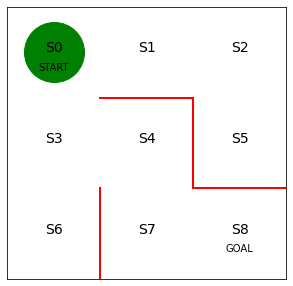

In [5]:
#draw maze

fig = plt.figure(figsize = (5,5))
ax = plt.gca()

#draw redwall

plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color = 'red', linewidth =2 )
plt.plot([2,2], [2,1], color = 'red', linewidth = 2)
plt.plot([2,3], [1,1], color = 'red', linewidth = 2)

#states

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size = 14, ha= 'center')
plt.text(0.5, 1.5, 'S3', size = 14, ha = 'center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size = 14, ha = 'center')
plt.text(0.5,0.5,'S6', size = 14, ha = 'center')
plt.text(1.5, 0.5, 'S7', size = 14, ha = 'center')
plt.text(2.5, 0.5, 'S8', size = 14, ha = 'center')
plt.text(0.5, 2.3, 'START', ha = 'center')
plt.text(2.5, 0.3, 'GOAL', ha = 'center')

# draw settings
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
               labelbottom=False, right=False, left=False, labelleft=False)

# draw agent
line, = ax.plot([0.5], [2.5], marker="o", color = 'g', markersize = 60)

In [6]:
# Initial Value of parameter theta_0
# Each row represents up, right, down, left
theta_0 = np.array([[np.nan, 1, 1, np.nan], #s0
                   [np.nan, 1, np.nan, 1], #s1
                   [np.nan, np.nan, 1, 1], #s2
                    [1, 1, 1, np.nan], #s3
                    [np.nan, np.nan, 1, 1], #s4
                    [1, np.nan, np.nan, np.nan], #s5
                    [1, np.nan, np.nan, np.nan], #s6
                    [1, 1, np.nan, np.nan] #s7
                   ]) #s8 does not have a policy because it is GOAL

# convert parameter theta into policy pi
def simple_convert_into_pi_from_theta(theta):
    '''calculates ratio of values'''
    

    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :]/ np.nansum(theta[i, :])
    pi = np.nan_to_num(pi) #convert nan to 0
    
    return pi

#calculate initial policy pi_0
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [7]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [8]:
# state s after 1 step move

def get_next_s(pi,s):
    direction = ["up", "right", "down", "left"]
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    # choose direction according to probability of pi[s,:]
    
    if next_direction == "up":
        s_next = s - 3 #moving up reduces s value of 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s+ 3
    elif next_direction == "left":
        s_next = s - 1
    
    return s_next
# moves agent until GOAL state
def goal_maze(pi):
    s = 0 #starting point
    state_history = [0] #records agent's path
    
    while (1): #repeat until GOAL
        next_s = get_next_s(pi, s)
        state_history.append(next_s) # append next path to path list(state history)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return state_history

state_history = goal_maze(pi_0)

In [9]:
print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(state_history) - 1) + "단계입니다")

[0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 5, 2, 1, 0, 3, 0, 3, 6, 3, 0, 3, 4, 7, 8]
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다


In [10]:
#visualize moving agent
from matplotlib import animation
from IPython.display import HTML

def init():
    "Initialize background image"
    line.set_data([], [])
    return (line,)

def animate(i):
    '''create image by frame'''
    state = state_history[i] # current location
    x = (state % 3) + 0.5 # x coordinate of state
    y = 2.5 - int(state / 3) # y coordinate 
    line.set_data(x, y)
    return(line,)

# create animation
anim = animation.FuncAnimation(fig, animate, init_func = init, frames=len(state_history),
                               interval = 200, repeat = False)

HTML(anim.to_jshtml())

In [11]:
#converts parameter theta_0 into pilicy pi(using softmax)
def softmax_convert_into_pi_from_theta(theta):
    
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta) #convert theta into exp(theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        #calculate using softmax
    pi = np.nan_to_num(pi) # convert nan to 0
    
    return pi

In [12]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [13]:
#get action and state after 1 step
def get_action_and_next_s(pi,s):
    direction = ["up", "right", "down", "left"]
    #choose direction acoording to pi[s,:]
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2 
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1
    return [action , s_next]



In [14]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while (1):
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action #add current state(-1 because its last) to history
        
        s_a_history.append([next_s, np.nan])#add next state to history, action is yet unknown -> nan
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return s_a_history

In [15]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다.")

[[0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 0], [0, 2], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다.


In [2]:
#update theta

def update_theta(theta, pi, s_a_history):
    eta = 0.1 #learning rate
    T = len(s_a_history) - 1 #목표 지점에 이르기까지 걸린 단계 수
    
    [m, n] = theta.shape
    delta_theta = theta.copy() # delta theta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨
    
    # calculate delta_theta by its values
    for i in range(0, m):
        for j in range(0 ,n):
            if not(np.isnan(theta[i, j])): #theta is not nan
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                #get state 'i' from history
                
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                #action 'j' at state 'i'
                
                N_i = len(SA_i) # all action num at state i
                N_ij = len(SA_ij) # all action j num at state i
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
    
    new_theta = theta + eta * delta_theta

    return new_theta
    


In [16]:
#update policy

new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49852942 0.50147058 0.        ]
 [0.         0.49926471 0.         0.50073529]
 [0.         0.         0.5        0.5       ]
 [0.33202647 0.33496908 0.33300445 0.        ]
 [0.         0.         0.50147058 0.49852942]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50294114 0.49705886 0.         0.        ]]


In [17]:
#get out of maze using policy gradient algorithm

stop_epsilon = 10**-4 # stop learning if policy change rate is smaller than 10^-4

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue: # repeat until in_continue is False
    s_a_history = goal_maze_ret_s_a(pi) #get history of maze search due to pilicy pi
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)

    print(np.sum(np.abs(new_pi-pi))) #print policy change
    print("Took " + str(len(s_a_history) - 1) + "steps to goal state.")
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi


0.0034613500390137664
Took 6steps to goal state.
0.00011764268177564229
Took 4steps to goal state.
0.00011745040462004738
Took 4steps to goal state.
0.00011725859871105151
Took 4steps to goal state.
0.00011706726250762349
Took 4steps to goal state.
0.00011687639447561203
Took 4steps to goal state.
0.00011668599308660606
Took 4steps to goal state.
0.00011649605681805439
Took 4steps to goal state.
0.00011630658415551914
Took 4steps to goal state.
0.0012198803811682684
Took 6steps to goal state.
0.00011802241411342299
Took 4steps to goal state.
0.00011782882284551432
Took 4steps to goal state.
0.00011763570834095669
Took 4steps to goal state.
0.00011744306903207873
Took 4steps to goal state.
0.00011725090335641154
Took 4steps to goal state.
0.0001170592097597175
Took 4steps to goal state.
0.00011686798669226055
Took 4steps to goal state.
0.003458333751135816
Took 6steps to goal state.
0.00011853520245893104
Took 4steps to goal state.
0.00011834010370982001
Took 4steps to goal state.
0.00

In [18]:
np.set_printoptions(precision = 3, suppress = True) #num of significant digits 3, do not print indices
print(pi)

[[0.    0.015 0.985 0.   ]
 [0.    0.209 0.    0.791]
 [0.    0.    0.428 0.572]
 [0.009 0.982 0.01  0.   ]
 [0.    0.    0.983 0.017]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.016 0.984 0.    0.   ]]


In [20]:
#visualize agent move history

from matplotlib import animation
from IPython.display import HTML

def init():
    #initialize background image
    line.set_data([], [])
    return (line,)

def animate(i):
    #create image per frame
    state = s_a_history[i][0] #current state
    x = (state % 3) + 0.5 #x coord 
    y = 2.5 - int(state/3) #y coord
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history),interval = 200, repeat=False)


HTML(anim.to_jshtml())